In [1]:
# Import necessary packages
import pandas as pd 
import os
from helper_functions import date_to_decimal_year, rain_predictor
from plot_functions import eruption_counter, rain_plotter
from el_nino_functions import elnino_strengths
import numpy as np

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "average_galapagos.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [31]:
print(len(volcanic_events))

34


In [4]:
volcanic_events = volcanic_events.drop(5)
volcanic_events = volcanic_events.drop(17)
volcanic_events = volcanic_events.drop(18)
print(volcanic_events[15:])

          Volcano       Start         End  Max Explosivity During El Nino
16     Fernandina  1991-04-19  1991-04-24                2              n
19     Fernandina  1995-01-25  1995-04-08                2              y
20  Negra, Sierra  1998-01-11        None                0              n
21    Azul, Cerro  1998-09-15  1998-10-21                1              n
22  Negra, Sierra  2005-04-16        None                0              n
23     Fernandina  2005-05-13  2005-05-29                2              n
24  Negra, Sierra  2005-10-22  2005-10-30                3              n
25    Azul, Cerro  2008-05-29  2008-06-17                1              n
26     Fernandina  2009-04-10  2009-04-28                2              n
27           Wolf  2015-05-25  2015-07-16                4              y
28     Fernandina  2017-09-04  2017-09-07                2              n
29    Azul, Cerro  2017-03-10        None                0              n
30     Fernandina  2018-06-16  2018-06

In [5]:
volcanic_events = volcanic_events.drop(24)
print(volcanic_events[15:])

          Volcano       Start         End  Max Explosivity During El Nino
16     Fernandina  1991-04-19  1991-04-24                2              n
19     Fernandina  1995-01-25  1995-04-08                2              y
20  Negra, Sierra  1998-01-11        None                0              n
21    Azul, Cerro  1998-09-15  1998-10-21                1              n
22  Negra, Sierra  2005-04-16        None                0              n
23     Fernandina  2005-05-13  2005-05-29                2              n
25    Azul, Cerro  2008-05-29  2008-06-17                1              n
26     Fernandina  2009-04-10  2009-04-28                2              n
27           Wolf  2015-05-25  2015-07-16                4              y
28     Fernandina  2017-09-04  2017-09-07                2              n
29    Azul, Cerro  2017-03-10        None                0              n
30     Fernandina  2018-06-16  2018-06-21                1              n
31  Negra, Sierra  2018-06-26  2018-08

In [6]:
volcanic_events = volcanic_events.drop(0)
volcanic_events = volcanic_events.drop(1)
volcanic_events = volcanic_events.drop(2)
print(len(volcanic_events))

27


In [7]:
volcanic_events['Volcano'] = np.array(['Average' for i in range(len(volcanic_events))])

In [8]:
lons = np.array([-91.35 for i in range(len(rainfall))])
lats = np.array([.05 for i in range(len(rainfall))])
rainfall['Longitude'] = lons
rainfall['Latitude'] = lats
print(rainfall)

            Date  Precipitation  Longitude  Latitude
0     2000-06-01       0.675112     -91.35      0.05
1     2000-06-02       0.344920     -91.35      0.05
2     2000-06-03       0.069544     -91.35      0.05
3     2000-06-04       0.000957     -91.35      0.05
4     2000-06-05       0.009161     -91.35      0.05
...          ...            ...        ...       ...
8357  2022-09-26       0.253598     -91.35      0.05
8358  2022-09-27       0.207847     -91.35      0.05
8359  2022-09-28       0.102879     -91.35      0.05
8360  2022-09-29       0.253887     -91.35      0.05
8361  2022-09-30       0.123092     -91.35      0.05

[8362 rows x 4 columns]


Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', and 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [9]:
sites_dict = {'Average': (-91.35, .05, 'Average')} # Long/lat pairs must exist in rainfall data
quantiles = 4 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
log_flag = True # If true, applies a log scaling to the data
by_season = False # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range

# Uses the elnino_strengths function to get all instances of el ninos and la ninas
start = min(rainfall['Date'])
end = max(rainfall['Date'])
strengths = {}
anom_types = {'weak nina': -.5, 'moderate nina': -1, 'strong nina': -1.5, 'weak nino': .5, 'moderate nino': 1, 'strong nino': 1.5, 'very strong nino': 2}
for i in anom_types:
    if i == 'weak nina' or i == 'weak nino':
        strengths.update(elnino_strengths(oni, anom_types[i], i, 5))
    else:
        strengths.update(elnino_strengths(oni, anom_types[i], i, 3)) 

# Uncomment below to use rain predictor gauge location. (For analyses of eruptions between 1964 and 2000)

compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
print_summary = False # Make true if you want to see summary of regression
pred_rain = rain_predictor(rainfall, sites_dict, compare_site, rolling_number, print_summary)
rainfall_two = pred_rain[pred_rain['Date'] < start].copy()
rainfall = pd.concat([rainfall, rainfall_two])
start = min(rainfall['Date'])
end = max(rainfall['Date'])

# Picks out elninos/laninas between the start and end dates. Converts dates to decimals.
elninos = {'weak nina': [], 'moderate nina': [], 'strong nina': [], 'weak nino': [], 'moderate nino': [], 'strong nino': [], 'very strong nino': []}

if strengths != None:
    for j in strengths:
        for i in strengths[j]:
            if i[1] > start and i[0] < end:
                first = max(i[0], start)
                last = min(i[1], end)
                elninos[j].append([date_to_decimal_year(first), date_to_decimal_year(last)])



We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

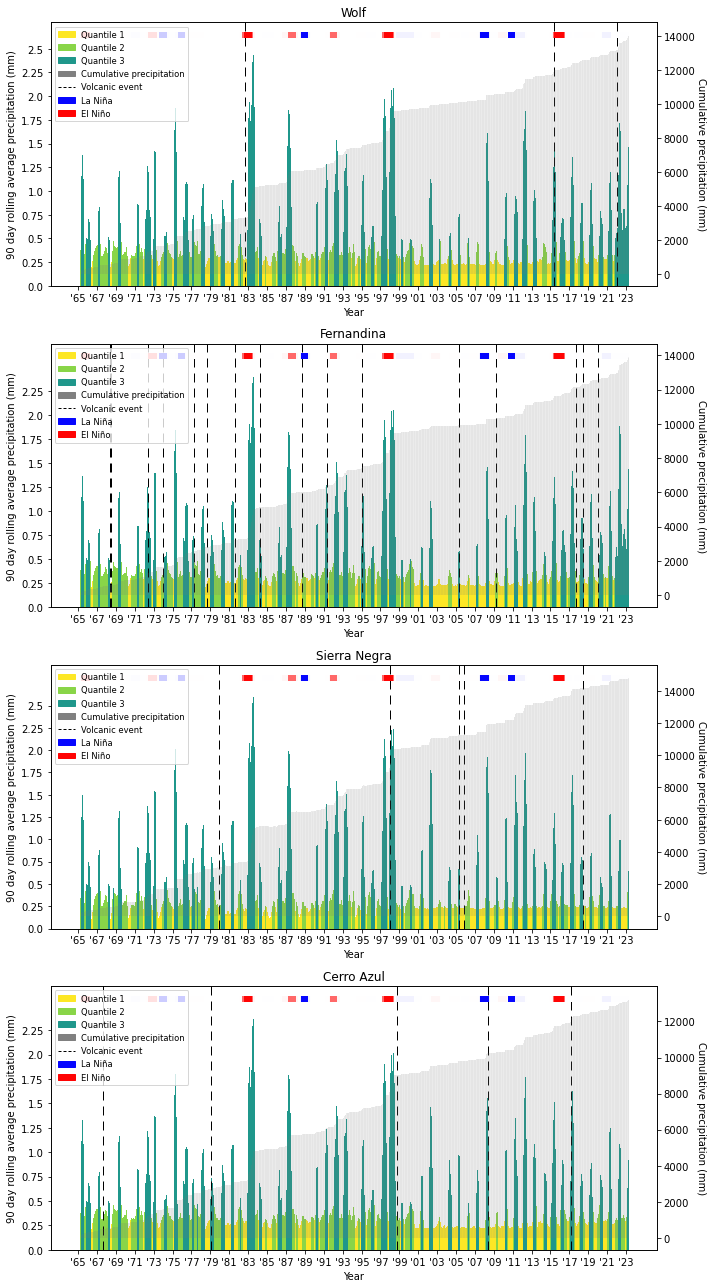

In [5]:
plot_type = 'bar'

rain_plotter(plot_type ,sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season, log_flag, elninos)

Below we break up eruptions into quantiles, first all together, and then by individual volcano.

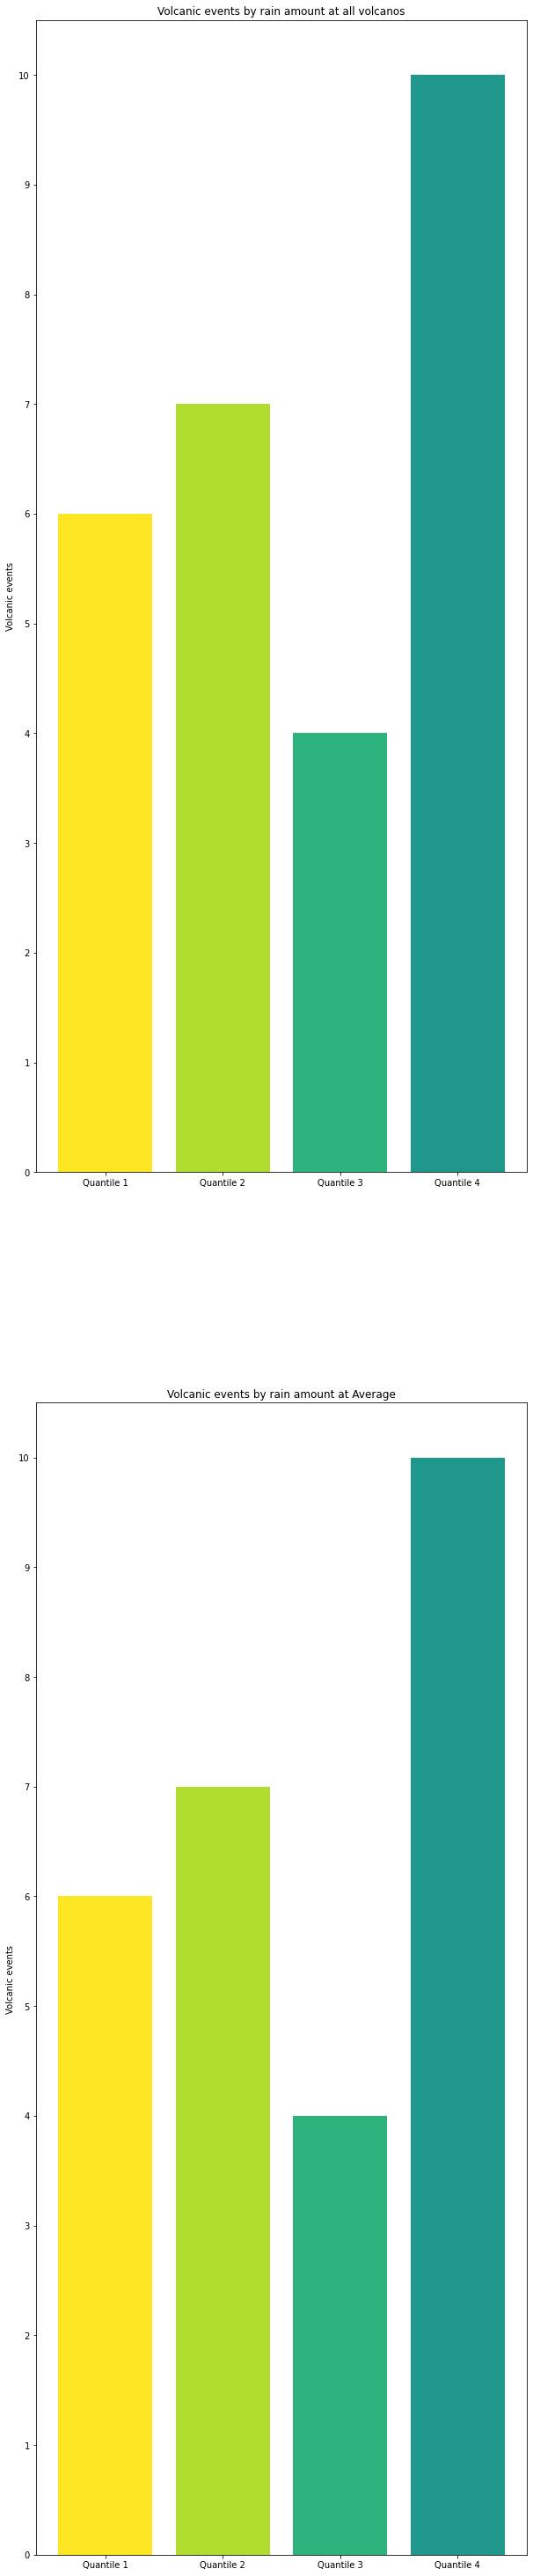

In [10]:
all,vals = eruption_counter(sites_dict, volcanic_events, rainfall, quantiles, rolling_number, by_season)

In [15]:
print(fern)

[0.1179413  0.3600202  1.90755385 0.17462319 0.95163741 0.05712636
 0.62276437 0.13447352 0.05476461 0.09727603 0.71014895 0.1698997
 2.32322103 1.49312658 4.00950722 0.16753795 0.61404948 0.50750678
 2.22054146 0.79460719 2.58009651 0.03448536 0.80306727 0.15401552
 0.05568071 0.0657085  0.12841422]


In [14]:
fern = np.array(vals['Average'])
print(all['Average'].mean())

0.6712235718502669


Below, we plot rainfall at the volcano sites by year.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

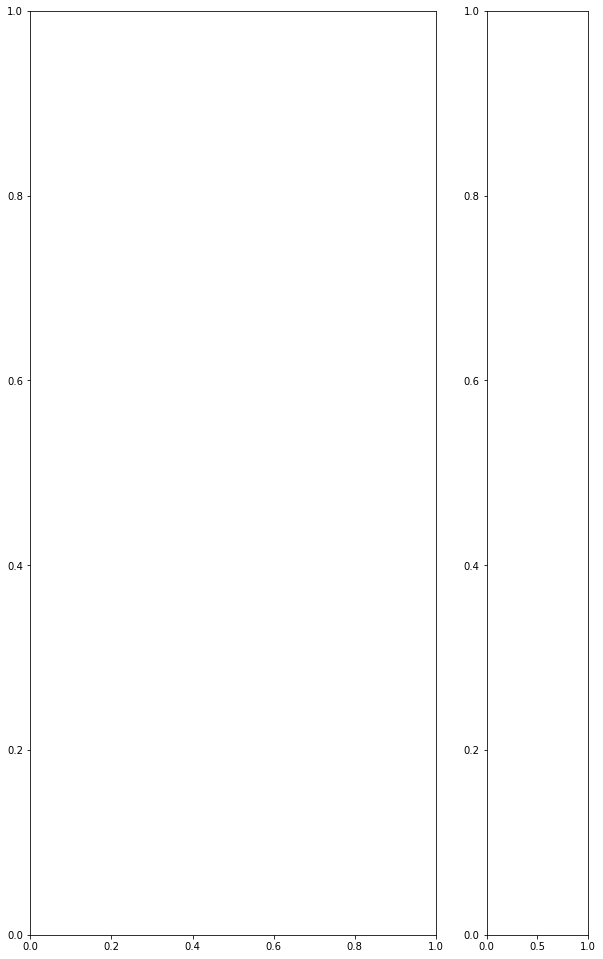

In [10]:
plot_type = 'annual'

rain_plotter(plot_type, sites_dict, rainfall, quantiles, rolling_number, volcanic_events, by_season=False, log_flag=True, elninos=elninos)